# CLUSTERING ON NUMERICAL AND CATEGORICAL FEATURES USING GOWER'S DISTANCE & GBSCAN

<b>CREATING DATAFRAME

In [1]:
import pandas as pd

# Creating a dictionary with the data
dictionary = {"age": [22, 25, 30, 38, 42, 47, 55, 62, 61, 90], 
              "gender": ["M", "M", "F", "F", "F", "M", "M", "M", "M", "M"], 
              "civil_status": ["SINGLE", "SINGLE", "SINGLE", "MARRIED", "MARRIED", "SINGLE", "MARRIED", "DIVORCED", "MARRIED", "DIVORCED"], 
              "salary": [18000, 23000, 27000, 32000, 34000, 20000, 40000, 42000, 25000, 70000], 
              "has_children": [False, False, False, True, True, False, False, False, False, True], 
              "purchaser_type": ["LOW_PURCHASER", "LOW_PURCHASER", "LOW_PURCHASER", "HEAVY_PURCHASER", "HEAVY_PURCHASER", "LOW_PURCHASER", "MEDIUM_PURCHASER", "MEDIUM_PURCHASER", "MEDIUM_PURCHASER", "LOW_PURCHASER"]}

# Creating a Pandas DataFrame from the dictionary
dataframe = pd.DataFrame.from_dict(dictionary)

In [2]:
dataframe

,age,gender,civil_status,salary,has_children,purchaser_type
0,22,M,SINGLE,18000,False,LOW_PURCHASER
1,25,M,SINGLE,23000,False,LOW_PURCHASER
2,30,F,SINGLE,27000,False,LOW_PURCHASER
3,38,F,MARRIED,32000,True,HEAVY_PURCHASER
4,42,F,MARRIED,34000,True,HEAVY_PURCHASER
5,47,M,SINGLE,20000,False,LOW_PURCHASER
6,55,M,MARRIED,40000,False,MEDIUM_PURCHASER
7,62,M,DIVORCED,42000,False,MEDIUM_PURCHASER
8,61,M,MARRIED,25000,False,MEDIUM_PURCHASER
9,90,M,DIVORCED,70000,True,LOW_PURCHASER


<b>INSTALLING GOWER PACKAGE

In [4]:
!pip install gower

  Running setup.py bdist_wheel for gower: started
  Running setup.py bdist_wheel for gower: finished with status 'done'
  Stored in directory: C:\Users\hp\AppData\Local\pip\Cache\wheels\c0\09\9b\072d54d6ced0f43a179852e3f09532d0131e25ff7cb4e5ee75
Successfully built gower


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 21.1.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


<b>THE OVERALL CLUSTERING PROCESS

In [60]:
import gower

distance_matrix = gower.gower_matrix(dataframe)
ind_col = ["Customer 1","Customer 2","Customer 3","Customer 4","Customer 5","Customer 6","Customer 7","Customer 8","Customer 9","Customer 10"]
dm_df = pd.DataFrame(distance_matrix, index=ind_col, columns=ind_col)
dm_df

,Customer 1,Customer 2,Customer 3,Customer 4,Customer 5,Customer 6,Customer 7,Customer 8,Customer 9,Customer 10
Customer 1,0.000000,0.020039,0.184389,0.691123,0.705020,0.058016,0.510720,0.530920,0.482116,0.619048
Customer 2,0.020039,0.000000,0.164350,0.671084,0.684982,0.054460,0.490681,0.510881,0.462077,0.599009
Customer 3,0.184389,0.164350,0.000000,0.506733,0.520631,0.197802,0.612045,0.632245,0.594430,0.720373
Customer 4,0.691123,0.671084,0.506733,0.000000,0.013898,0.670922,0.533883,0.696940,0.543741,0.737449
Customer 5,0.705020,0.684982,0.520631,0.013898,0.000000,0.668013,0.519985,0.683042,0.540832,0.723551
Customer 6,0.058016,0.054460,0.197802,0.670922,0.668013,0.000000,0.452704,0.472905,0.424100,0.561032
Customer 7,0.510720,0.490681,0.612045,0.533883,0.519985,0.452704,0.000000,0.163058,0.053814,0.727376
Customer 8,0.530920,0.510881,0.632245,0.696940,0.683042,0.472905,0.163058,0.000000,0.191661,0.564318
Customer 9,0.482116,0.462077,0.594430,0.543741,0.540832,0.424100,0.053814,0.191661,0.000000,0.755979
Customer 10,0.619048,0.599009,0.720373,0.737449,0.723551,0.561032,0.727376,0.564318,0.755979,0.000000


In [6]:
from sklearn.cluster import DBSCAN

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.3, 
                        min_samples=2, 
                        metric="precomputed")

In [13]:
# Fitting the clustering algorithm
dbscan_cluster.fit(distance_matrix)

# Adding the results to a new column in the dataframe
dataframe["cluster"] = dbscan_cluster.labels_

In [50]:
dataframe

,age,gender,civil_status,salary,has_children,purchaser_type,cluster
0,22,M,SINGLE,18000,False,LOW_PURCHASER,0
1,25,M,SINGLE,23000,False,LOW_PURCHASER,0
2,30,F,SINGLE,27000,False,LOW_PURCHASER,0
3,38,F,MARRIED,32000,True,HEAVY_PURCHASER,1
4,42,F,MARRIED,34000,True,HEAVY_PURCHASER,1
5,47,M,SINGLE,20000,False,LOW_PURCHASER,0
6,55,M,MARRIED,40000,False,MEDIUM_PURCHASER,2
7,62,M,DIVORCED,42000,False,MEDIUM_PURCHASER,2
8,61,M,MARRIED,25000,False,MEDIUM_PURCHASER,2
9,90,M,DIVORCED,70000,True,LOW_PURCHASER,-1


<b>SOME ANALYSIS ON THE CLUSTERS

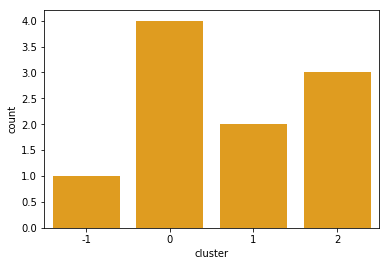

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

c_counts = sns.countplot(dataframe.cluster, color="orange")

In [36]:
gender_grouped = dataframe.groupby("gender").apply(lambda a: a.drop("gender", axis=1)[:])

In [37]:
gender_grouped

age civil_status  salary  has_children    purchaser_type  cluster
gender                                                                     
F      2   30       SINGLE   27000         False     LOW_PURCHASER        0
       3   38      MARRIED   32000          True   HEAVY_PURCHASER        1
       4   42      MARRIED   34000          True   HEAVY_PURCHASER        1
M      0   22       SINGLE   18000         False     LOW_PURCHASER        0
       1   25       SINGLE   23000         False     LOW_PURCHASER        0
       5   47       SINGLE   20000         False     LOW_PURCHASER        0
       6   55      MARRIED   40000         False  MEDIUM_PURCHASER        2
       7   62     DIVORCED   42000         False  MEDIUM_PURCHASER        2
       8   61      MARRIED   25000         False  MEDIUM_PURCHASER        2
       9   90     DIVORCED   70000          True     LOW_PURCHASER       -1

In [42]:
# Male Cluster Counts

males = dataframe[dataframe["gender"]=="M"]
males.cluster.value_counts()

 2    3
 0    3
-1    1
Name: cluster, dtype: int64

Text(0.5,1,'MALE CLUSTERS')

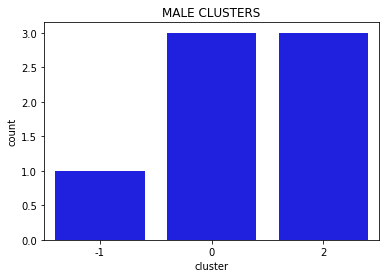

In [48]:
sns.countplot(males.cluster, color="blue")
plt.title("MALE CLUSTERS")

In [45]:
# Female Cluster Counts

females = dataframe[dataframe["gender"]=="F"]
females.cluster.value_counts()

1    2
0    1
Name: cluster, dtype: int64

Text(0.5,1,'FEMALE CLUSTERS')

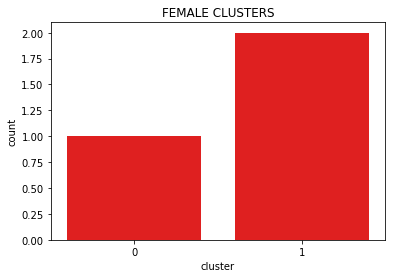

In [47]:
sns.countplot(females.cluster, color="red")
plt.title("FEMALE CLUSTERS")

--------------